In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os



In [3]:
from PIL import Image

In [17]:
for i in os.listdir('validation_full_size/Motorola-Droid-Maxx/'):
    if(i.split('.')[-1]!='jpg'):
        j_new = i.split('.')[:-2][0]+i.split('.')[-1]+'.jpg'
        os.rename('validation_full_size/Motorola-Droid-Maxx/'+i,'validation_full_size/Motorola-Droid-Maxx/'+j_new)

In [21]:
for i in os.listdir('validation_full_size/'):
    for j in os.listdir('validation_full_size/' + i):
        if(j.split('.')[-1]!='jpg'):
            j_new = j.split('.')[:-1][0]+'.jpg'
            print(j_new)
            print(j)
            #os.rename('validation_full_size/' + i+'/'+j,'validation_full_size/' + i+'/'+j_new)

In [13]:
img_size_list_h = []
img_size_list_w = []
for i in os.listdir('train/'):
    for j in os.listdir('train/' + i):
        im = Image.open('train/' + i + '/'+j)
        img_size_list_h.append(im.size[0])
        img_size_list_w.append(im.size[1])
        

In [14]:
img_size_arr_h = np.array(img_size_list_h)
img_size_arr_w = np.array(img_size_list_w)

In [15]:
img_size_arr = np.sqrt(img_size_arr_h*img_size_arr_h)

In [16]:
plt.hist(img_size_arr_w)


(array([      0.,       0.,       0.,       0.,       0.,  790600.,
              0.,       0.,       0.,       0.]),
 array([ 511.5,  511.6,  511.7,  511.8,  511.9,  512. ,  512.1,  512.2,
         512.3,  512.4,  512.5]),
 <a list of 10 Patch objects>)

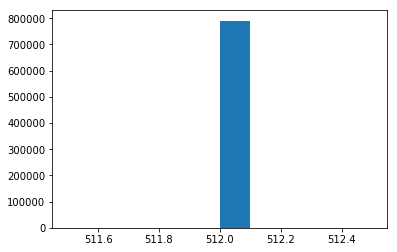

In [17]:
plt.show()

In [18]:
predictions = np.load('predictions.npy')

In [19]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 9, 9, 2, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3,

In [20]:
correct = np.load('correct_classes.npy')

In [21]:
correct

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3,

In [23]:
true_positive = np.zeros(10)
false_positive = np.zeros(10)
true_negative = np.zeros(10)
false_negative = np.zeros(10)
for i in range(len(predictions)):
    if(predictions[i]==correct[i]):
        true_positive[predictions[i]] = true_positive[predictions[i]] + 1
    else:
        false_positive[predictions[i]] = false_positive[predictions[i]] + 1
        false_negative[correct[i]] = false_negative[correct[i]] +1

In [24]:
print('true_positive')
print(true_positive)
print('false_positive')
print(false_positive)
print('false_negative')
print(false_negative)
print('Total')
print(true_positive+false_negative)


true_positive
[ 97.  98.  67.  68.  82.  73.  97.  80.  86.  89.]
false_positive
[ 6.  4.  3.  4.  1.  3.  4.  1.  4.  8.]
false_negative
[ 1.  1.  8.  9.  4.  3.  2.  6.  2.  2.]
Total
[ 98.  99.  75.  77.  86.  76.  99.  86.  88.  91.]


In [25]:
x = np.zeros((10,10))
for i in range(len(predictions)):
    x[predictions[i]][correct[i]] += 1

In [26]:
x

array([[ 97.,   0.,   5.,   0.,   0.,   0.,   1.,   0.,   0.,   0.],
       [  0.,  98.,   0.,   0.,   1.,   1.,   0.,   2.,   0.,   0.],
       [  1.,   0.,  67.,   0.,   1.,   1.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   1.,  68.,   0.,   0.,   1.,   1.,   0.,   1.],
       [  0.,   0.,   0.,   0.,  82.,   0.,   0.,   0.,   1.,   0.],
       [  0.,   1.,   0.,   1.,   1.,  73.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   1.,   1.,   0.,  97.,   1.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   1.,   0.,  80.,   0.,   0.],
       [  0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,  86.,   1.],
       [  0.,   0.,   2.,   5.,   0.,   0.,   0.,   1.,   0.,  89.]])

In [29]:
max = 0
for i in range(10):
    for j in range(10):
        if(x[i][j]+x[j][i] > max and i!=j):
            max = x[i][j]+x[j][i]
            print(i,j)

0 2
